In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'file_path.csv' with the path to your CSV file
file_path = '/content/Data for Assignament.csv'

# Read CSV file into DataFrame, specifying the encoding
df = pd.read_csv(file_path, encoding='latin1')

# Display the DataFrame
print(df)


       SL. NO.  MONTH  DD/MM/YYYY              ORDER ID          REGION  \
0          1.0  April  04/01/2023            1023668971         Gujarat   
1          2.0  April  04/01/2023  OD327722511764176100      Tamil Nadu   
2          3.0  April  04/01/2023  OD327717954177448100          Odisha   
3          4.0  April  04/01/2023   405-6031826-1137139  Madhya Pradesh   
4          5.0  April  04/01/2023   407-2233598-8658743       Karnataka   
...        ...    ...         ...                   ...             ...   
64130      NaN    NaN         NaN                   NaN             NaN   
64131      NaN    NaN         NaN                   NaN             NaN   
64132      NaN    NaN         NaN                   NaN             NaN   
64133      NaN    NaN         NaN                   NaN             NaN   
64134      NaN    NaN         NaN                   NaN             NaN   

      PROTECTION                       RANGE  \
0           Hand  Nitrile & Synthetic Gloves   
1  

In [62]:
# Rename the column 'DD/MM/YYYY' to 'date'
df.rename(columns={'DD/MM/YYYY': 'date'}, inplace=True)

# Display the DataFrame
print(df)

       SL. NO.  MONTH        date              ORDER ID          REGION  \
0          1.0  April  04/01/2023            1023668971         Gujarat   
1          2.0  April  04/01/2023  OD327722511764176100      Tamil Nadu   
2          3.0  April  04/01/2023  OD327717954177448100          Odisha   
3          4.0  April  04/01/2023   405-6031826-1137139  Madhya Pradesh   
4          5.0  April  04/01/2023   407-2233598-8658743       Karnataka   
...        ...    ...         ...                   ...             ...   
64130      NaN    NaN         NaN                   NaN             NaN   
64131      NaN    NaN         NaN                   NaN             NaN   
64132      NaN    NaN         NaN                   NaN             NaN   
64133      NaN    NaN         NaN                   NaN             NaN   
64134      NaN    NaN         NaN                   NaN             NaN   

      PROTECTION                       RANGE  \
0           Hand  Nitrile & Synthetic Gloves   
1  

In [66]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Find the minimum and maximum dates
min_date = df['date'].min()
max_date = df['date'].max()

# Display the results
print("Minimum date:", min_date)
print("Maximum date:", max_date)


Minimum date: 2023-01-06 00:00:00
Maximum date: 2024-12-02 00:00:00


In [67]:
# Print all column names
print(df.columns)


Index(['SL. NO.', 'MONTH', 'date', 'ORDER ID', 'REGION', 'PROTECTION', 'RANGE',
       'PRODUCT TITLE', 'PRODUCT', 'QUANTITY', 'INVOICE PRICE', 'WEBSITE',
       'STATUS', 'Platform Type', 'GST%', ' GST Amount ', 'Realization %',
       ' Realisation Amount ', 'Sales Price excluding GST',
       'Marketplace Commission %', ' Marketplace Commission ',
       'Month Serial Number', 'Unnamed: 22'],
      dtype='object')


**Total sales over time.**

In [71]:
# Convert 'date' column to datetime format if not already done
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract year from the 'date' column
df['year'] = df['date'].dt.year

# Group by year and sum up the sales
total_sales_by_year = df.groupby('year')[' Realisation Amount '].sum()

# Print the total sales by year
print(total_sales_by_year)


year
2023.0    1.686366e+07
2024.0    3.058958e+06
Name:  Realisation Amount , dtype: float64


) missing from current font.
  plt.tight_layout()
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


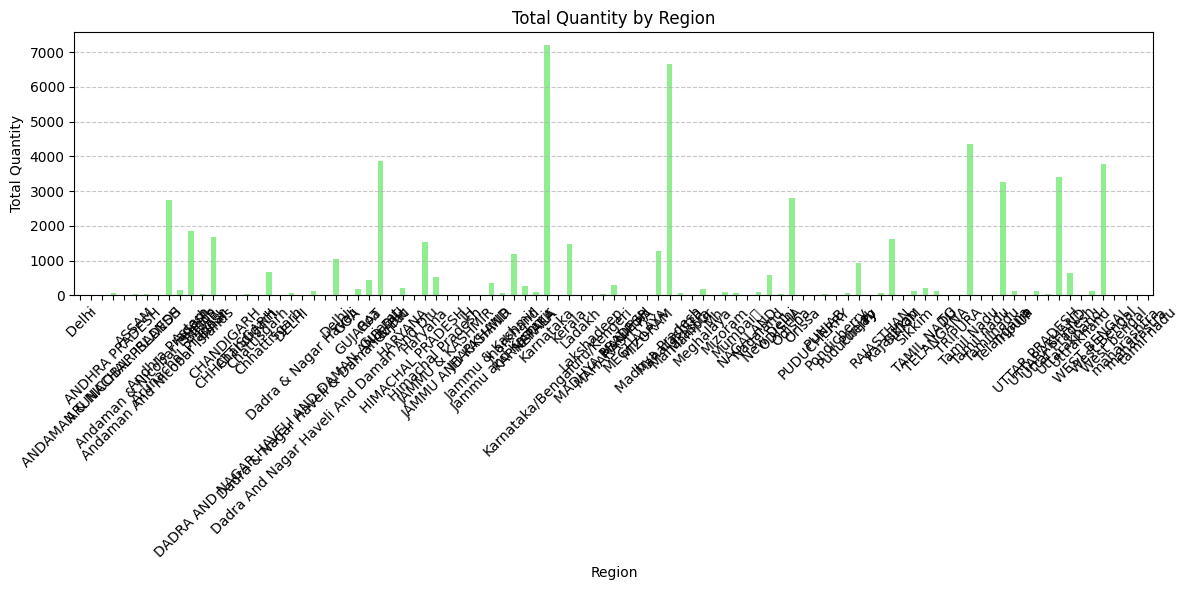

In [101]:
import matplotlib.pyplot as plt

# Group by region and sum up the quantities sold
total_quantity_by_region = df.groupby('REGION')['QUANTITY'].sum()

# Plotting
plt.figure(figsize=(12, 6))
total_quantity_by_region.plot(kind='bar', color='lightgreen')
plt.title('Total Quantity by Region')
plt.xlabel('Region')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Sales distribution by top 5 region, product category**

In [79]:
# Group by region and sum up the sales
total_sales_by_region = df.groupby('REGION')[' Realisation Amount '].sum()

# Sort the regions based on total sales and get the top five
top_five_regions = total_sales_by_region.sort_values(ascending=False).head(5)

# Display the top five regions
print(top_five_regions)


REGION
KARNATAKA      6.910392e+06
MAHARASHTRA    6.663031e+06
TAMIL NADU     4.138818e+06
GUJARAT        3.928089e+06
WEST BENGAL    3.400207e+06
Name:  Realisation Amount , dtype: float64


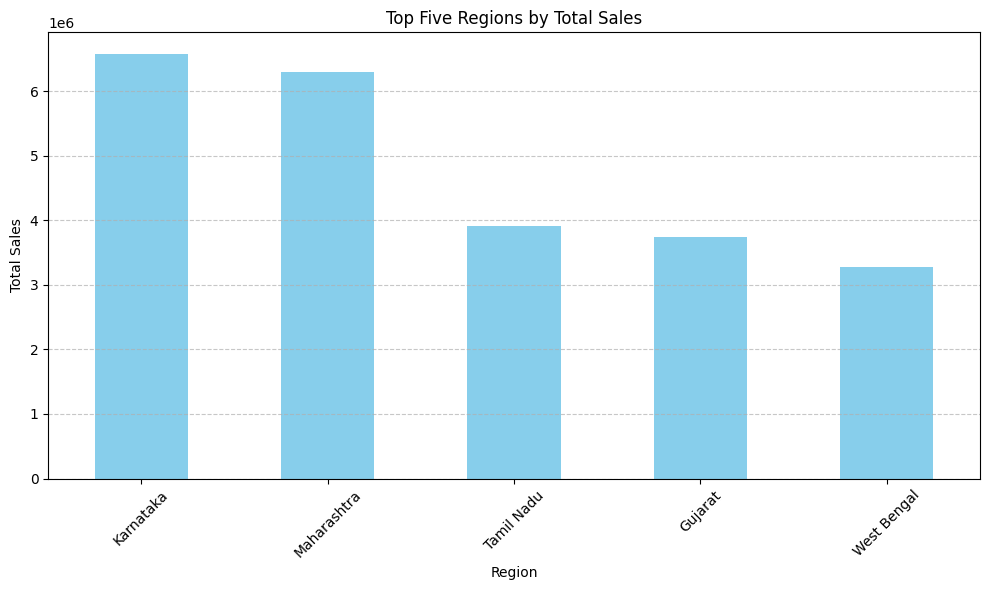

In [89]:

# Group by region and sum up the sales
total_sales_by_region = df.groupby('REGION')[' Realisation Amount '].sum()

# Sort the regions based on total sales and get the top five
top_five_regions = total_sales_by_region.sort_values(ascending=False).head(5)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_five_regions.plot(kind='bar', color='skyblue')
plt.title('Top Five Regions by Total Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Identify top-selling products by quantity.**

In [82]:
# Group by product category and sum up the quantities sold
total_quantity_by_product = df.groupby('PRODUCT')['QUANTITY'].sum()

# Sort the products based on total quantity sold and get the top 5 selling products
top_5_selling_products_by_quantity = total_quantity_by_product.sort_values(ascending=False).head(5)

# Display the top 5 selling products based on quantity sold
print("Top 5 selling products based on quantity sold:")
print(top_5_selling_products_by_quantity)


Top 5 selling products based on quantity sold:
PRODUCT
Shoe         49546.0
Gloves        3532.0
Goggles       2084.0
Face mask      879.0
Jacket         704.0
Name: QUANTITY, dtype: float64


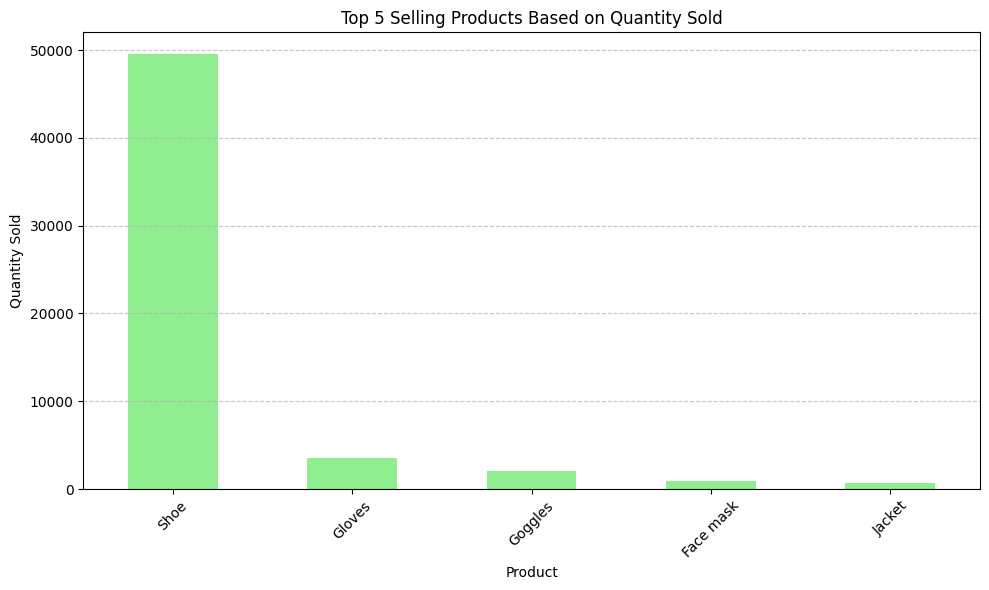

In [90]:


# Group by product category and sum up the quantities sold
total_quantity_by_product = df.groupby('PRODUCT')['QUANTITY'].sum()

# Sort the products based on total quantity sold and get the top 5 selling products
top_5_selling_products_by_quantity = total_quantity_by_product.sort_values(ascending=False).head(5)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_5_selling_products_by_quantity.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Selling Products Based on Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Order frequency analysis by date**

In [84]:
# Convert 'date' column to datetime format if not already done
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract month from the 'date' column
df['month'] = df['date'].dt.month

# Group by month and count the number of orders
order_frequency_by_month = df.groupby('month').size()

# Display the order frequency analysis by month
print("Order frequency analysis by month:")
print(order_frequency_by_month)


Order frequency analysis by month:
month
1.0     1008
2.0     1217
3.0     1399
4.0     1978
5.0     2778
6.0     1155
7.0     1343
8.0     1316
9.0     1333
10.0    1328
11.0    3479
12.0    2361
dtype: int64


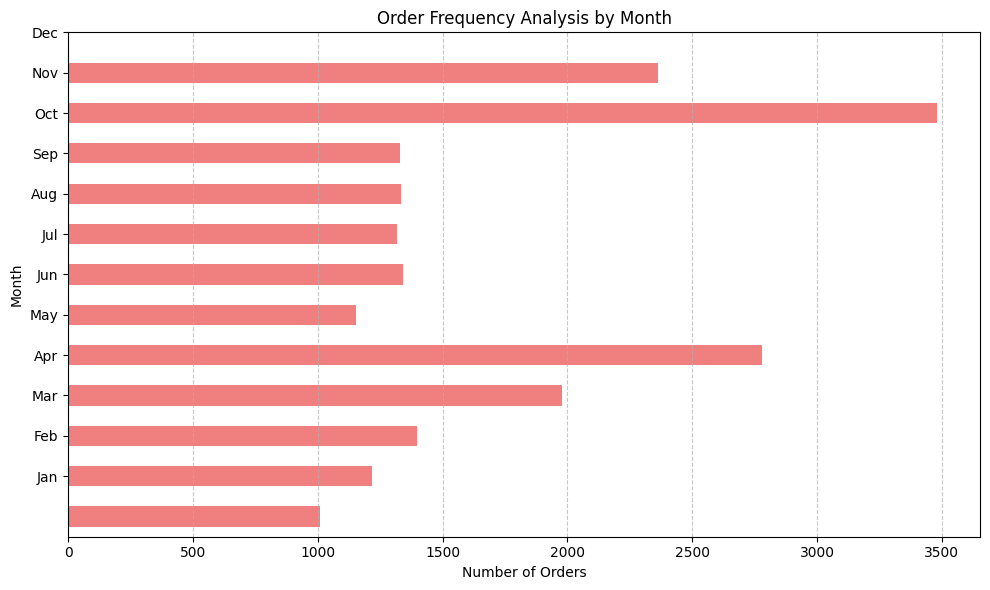

In [92]:


# Plotting
plt.figure(figsize=(10, 6))
order_frequency_by_month.plot(kind='barh', color='lightcoral')
plt.title('Order Frequency Analysis by Month')
plt.xlabel('Number of Orders')
plt.ylabel('Month')
plt.yticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Most popular products**

In [85]:
# Group by product and sum up the quantities sold
total_quantity_by_product = df.groupby('PRODUCT')['QUANTITY'].sum()

# Sort the products based on total quantity sold and get the most popular products
most_popular_products = total_quantity_by_product.sort_values(ascending=False)

# Display the most popular products
print("Most popular products:")
print(most_popular_products)


Most popular products:
PRODUCT
Shoe         49546.0
Gloves        3532.0
Goggles       2084.0
Face mask      879.0
Jacket         704.0
Rainwear       452.0
Helmet         359.0
Bump Cap        26.0
Coverall         7.0
Name: QUANTITY, dtype: float64


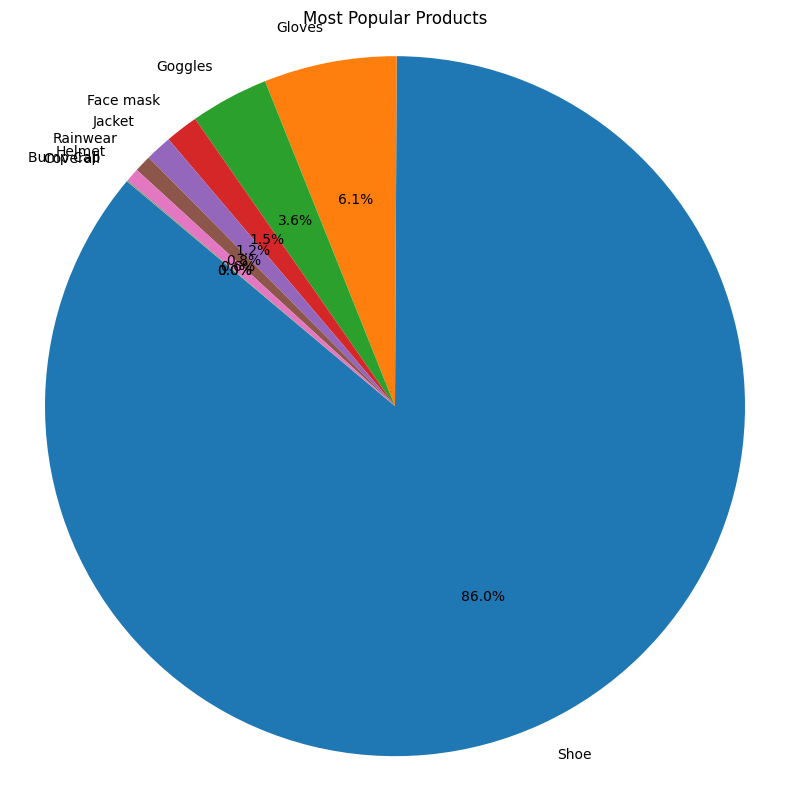

In [93]:
import matplotlib.pyplot as plt

# Group by product and sum up the quantities sold
total_quantity_by_product = df.groupby('PRODUCT')['QUANTITY'].sum()

# Sort the products based on total quantity sold and get the most popular products
most_popular_products = total_quantity_by_product.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(8, 8))
most_popular_products.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Most Popular Products')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


**Ordered most by website**

In [86]:
# Group by website and count the number of orders
orders_by_website = df.groupby('WEBSITE').size()

# Find the website with the most orders
most_ordered_website = orders_by_website.idxmax()

# Display the website with the most orders
print("Website with the most orders:", most_ordered_website)


Website with the most orders: Flipkart


**Ordered most by Plartform**

In [87]:
# Group by business type (Platform Type) and count the number of orders
orders_by_business_type = df.groupby('Platform Type').size()

# Find the business type with the most orders
most_ordered_business_type = orders_by_business_type.idxmax()

# Display the business type with the most orders
print("Business type with the most orders:", most_ordered_business_type)


Business type with the most orders: B2C


In [94]:
# Count the total occurrences of each status
status_counts = df['STATUS'].value_counts()

# Display the total count of each status
for status, count in status_counts.items():
    print(f"{status}: {count}")


Active: 37819
Returned: 11164
Cancelled: 4133
Cancellation: 523
 Returned: 40
return: 20
Cancelled : 4
returned: 1


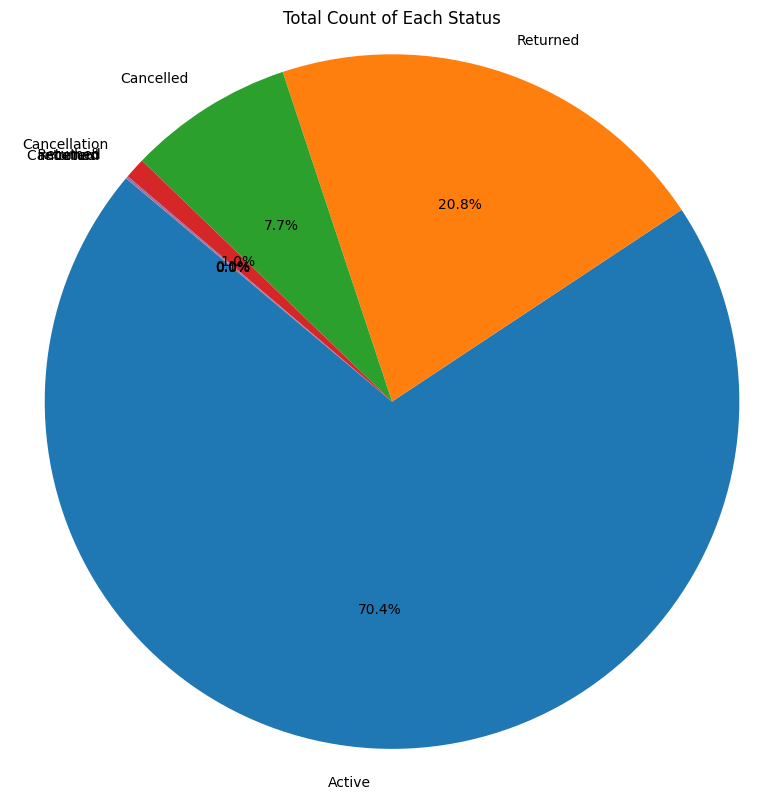

In [96]:
import matplotlib.pyplot as plt

# Count the total occurrences of each status
status_counts = df['STATUS'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Count of Each Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()
